In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm

In [37]:
def extract_ode_error_logs(results_folder: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "ode_log.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1


def extract_network_error_logs(path: str, i_range):
    error_0 = {}
    error_1 = {}
    for i in i_range:
        i_df = pd.read_csv(os.path.join(path, f"v_{i}", "0", "network_log.csv"))
        error_0[i] = np.array(i_df["log_generalisation_error_0"])
        error_1[i] = np.array(i_df["log_generalisation_error_1"])
    return error_0, error_1

In [38]:
first_half_ode_path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/2021-01-31-13-05-23/"
second_half_ode_path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/2021-01-31-15-40-08/"

network_path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/2021-01-30-19-32-30/"

In [39]:
first_half_ode_error_0, first_half_ode_error_1 = extract_ode_error_logs(first_half_ode_path, np.linspace(0, 0.5, 201))
second_half_ode_error_0, second_half_ode_error_1 = extract_ode_error_logs(second_half_ode_path, np.linspace(0.5, 1, 201))

In [40]:
network_0, network_1 = extract_network_error_logs(network_path, np.linspace(0, 100, 101)/100)

In [97]:
color_map = cm.get_cmap("viridis")

def error_plot(errors, color_map, xlim, ylim, axis_labels, i_frequency, save_name):
    fig = plt.figure(figsize=(20, 12))

    for i, (overlap, err) in enumerate(errors.items()):
        if i % i_frequency == 0:
            plt.plot(np.arange(len(err)), err, color=color_map(i/len(errors)), alpha=0.8, linewidth=5)

    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
    if not axis_labels:
        plt.tick_params(
                    axis='both',         # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False, # labels along the bottom edge are off
                    left=False,
                    labelleft=False
                ) 
    fig.show()
    fig.savefig(save_name, dpi=100, bbox_inches='tight', pad_inches=0)

No handles with labels found to put in legend.
<ipython-input-97-9b6d4215c116>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


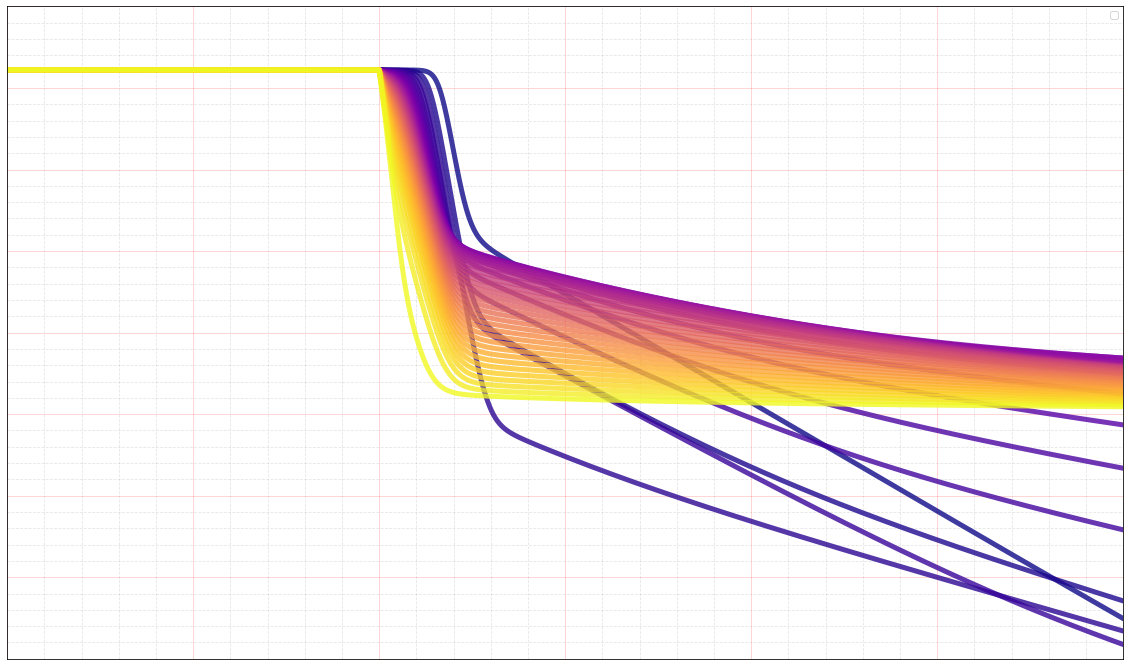

In [129]:
error_plot({**first_half_ode_error_1, **second_half_ode_error_1}, cm.get_cmap("plasma"), (0, 30000), (-8, 0), False, 10, "final_features_transfer.pdf")

In [198]:
def plot_cross_section(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim, N, color_map, axis_labels):
    forgettings = []
    net_forgettings = []
    fig = plt.figure()
    order=0
    for i, (o, errors) in enumerate(all_ode_errors.items()):
        switch_error = errors[switch_index]
        N_error = errors[N]
        forgetting = N_error - switch_error
        forgettings.append((o, forgetting))
    for i in range(len(forgettings) - 1):
        plt.plot([forgettings[i][0], forgettings[i+1][0]], [forgettings[i][1], forgettings[i+1][1]], color=color_map(i/len(all_ode_errors)), linewidth=5, zorder=order)
        order += 1
    for i, (o, errors) in enumerate(all_network_errors.items()):
        if i % cross_frequency == 0:
            switch_error = errors[switch_index]
            N_error = errors[N]
            forgetting = N_error - switch_error
            net_forgettings.append((o, forgetting))
            plt.scatter([o], [forgetting], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
    if not axis_labels:
        plt.tick_params(
                    axis='both',         # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False, # labels along the bottom edge are off
                    left=False,
                    labelleft=False
                ) 
    plt.xlim(0,1)
    if ylim is not None:
        plt.ylim(ylim)
    fig.show()
    if ylim is not None:
        fig.savefig(f"cross_section_{N - switch_index}_crosses_{ylim[0]}_{ylim[1]}.pdf", dpi=100, bbox_inches='tight', pad_inches=0)
    else:
        fig.savefig(f"cross_section_{N - switch_index}_crosses_no.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [199]:
def plot_cross_section_transfer(all_ode_errors, all_network_errors, cross_frequency, switch_index, ylim, N, color_map, axis_labels):
    transfers = []
    net_transfers = []
    fig = plt.figure()
    order=0
    for i, (o, errors) in enumerate(all_ode_errors.items()):
        switch_error = errors[switch_index]
        N_error = errors[N]
        transfer = switch_error - N_error
        transfers.append((o, transfer))
    for i in range(len(transfers) - 1):
        plt.plot([transfers[i][0], transfers[i+1][0]], [transfers[i][1], transfers[i+1][1]], color=color_map(i/len(all_ode_errors)), linewidth=5, zorder=order)
        order += 1
    for i, (o, errors) in enumerate(all_network_errors.items()):
        if i % cross_frequency == 0:
            switch_error = errors[switch_index]
            N_error = errors[N]
            transfer = switch_error - N_error
            net_transfers.append((o, transfer))
            plt.scatter([o], [transfer], color=color_map(i/len(all_network_errors)), marker='+', s=300, edgecolors='black', linewidth=2, zorder=order+1)
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)   
    if not axis_labels:
        plt.tick_params(
                    axis='both',         # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False, # labels along the bottom edge are off
                    left=False,
                    labelleft=False
                ) 
    plt.xlim(0,1)
    if ylim is not None:
        plt.ylim(ylim)
    fig.show()
    if ylim is not None:
        fig.savefig(f"cross_section_transfer_{N - switch_index}_crosses_{ylim[0]}_{ylim[1]}.pdf", dpi=100, bbox_inches='tight', pad_inches=0)
    else:
        fig.savefig(f"cross_section_transfer_{N - switch_index}_crosses_no.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

<ipython-input-198-55486cd9678b>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


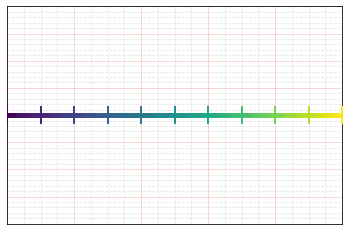

In [213]:
plot_cross_section({**first_half_ode_error_0, **second_half_ode_error_0}, network_0, 10, 10000, (-0.004, 0.004), 10000, cm.get_cmap("viridis"), False)

<ipython-input-199-423e45a74006>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


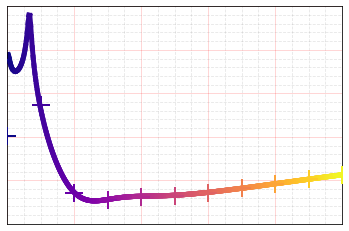

In [246]:
plot_cross_section_transfer({**first_half_ode_error_1, **second_half_ode_error_1}, network_1, 10, 10000, (3, 8), 29999, cm.get_cmap("plasma"), False)